<span style="color:#33ff9c; font-size:32px; font-weight:bold;"> Maryam Fendereski <br>
Maede Majidi <br>
Karen Panahi <br>
Nastaran Qalandari </span>

**Table of contents**<a id='toc0_'></a>    
- [<span style="color:#90ff33; font-weight:bold;"> Importing Required Libraries </span>](#toc1_)    
- [<span style="color:#90ff33; font-weight:bold;"> Loading Dataset </span>](#toc2_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Creating the Dataframe </span>](#toc2_1_)    
- [<span style="color:#90ff33; font-weight:bold;"> Getting Familiar with the Dataset </span>](#toc3_)    
  - [<span style="color:#33ff9c; font-weight:bold;"> Question 1 </span>](#toc3_1_)    
- [<span style="color:#90ff33; font-weight:bold;"> Preprocessing </span>](#toc4_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Features Importance </span>](#toc4_1_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Checking for Missing Values </span>](#toc4_2_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Checking for Outliers </span>](#toc4_3_)    
- [<span style="color:#33ff9c; font-weight:bold;"> Question 2 </span>](#toc5_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Training Models </span>](#toc5_1_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Utils </span>](#toc5_1_1_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Logistic Regression </span>](#toc5_1_2_)    
    - [<span style="color:#90ff33; font-weight:bold;"> KNN </span>](#toc5_1_3_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Naive Bayes </span>](#toc5_1_4_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Decision Tree </span>](#toc5_1_5_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Adaboost </span>](#toc5_1_6_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Random Forest </span>](#toc5_1_7_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Linear SVM </span>](#toc5_1_8_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Non-linear SVM </span>](#toc5_1_9_)    
- [<span style="color:#33ff9c; font-weight:bold;"> Question 3 </span>](#toc6_)    
  - [<span style="color:#90ff33; font-weight:bold;"> Testing the Models </span>](#toc6_1_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Utils </span>](#toc6_1_1_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Logistic Regression </span>](#toc6_1_2_)    
    - [<span style="color:#90ff33; font-weight:bold;"> KNN </span>](#toc6_1_3_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Naive Bayes </span>](#toc6_1_4_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Decision Tree </span>](#toc6_1_5_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Adaboost </span>](#toc6_1_6_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Random Forest </span>](#toc6_1_7_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Linear SVM </span>](#toc6_1_8_)    
    - [<span style="color:#90ff33; font-weight:bold;"> Non-linear SVM </span>](#toc6_1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Importing Required Libraries </span>](#toc0_)

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# <a id='toc2_'></a>[<span style="color:#90ff33; font-weight:bold;"> Loading Dataset </span>](#toc0_)

In [2]:
from ucimlrepo import fetch_ucirepo 

spambase = fetch_ucirepo(id=94) 

X = spambase.data.features 
y = spambase.data.targets 

print(spambase.metadata) 
print(spambase.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

## <a id='toc2_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Creating the Dataframe </span>](#toc0_)

In [3]:
df = pd.DataFrame(X, columns=spambase.feature_names_short)
df['target'] = y

# <a id='toc3_'></a>[<span style="color:#90ff33; font-weight:bold;"> Getting Familiar with the Dataset </span>](#toc0_)

In [4]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [5]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [8]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [9]:
y.describe()

,Class
count,4601.000000
mean,0.394045
std,0.488698
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   4601 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


## <a id='toc3_1_'></a>[<span style="color:#33ff9c; font-weight:bold;"> Question 1 </span>](#toc0_)

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
1.1 How many features are there in the dataset?
</span>

<span style="color:#33b8ff; font-size:18px;">
As you have observed, the variable X, which represents the feature vector, consists of 57 columns.<br>
This indicates that the dataset contains 57 features
</span>

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
1.2 Could you provide a brief explanation of each feature?
</span>

<span style="color:#33b8ff; font-size:18px;">
First of all, please note that all features in this dataset are numerical.<br>
Based on the names of each column and their data types, the columns that contain<br>
the keyword "freq" represent the frequency of a word or character in the text.<br>
However, there are three columns that do not have the "freq" keyword:<br>

1. capital_run_length_average: This column indicates the average length of phrases<br>
with capital letters in the text of the email.<br>
2. capital_run_length_longest: This column indicates the longest consecutive sequence<br>
of capital letters in the text of the email.<br>
3. capital_run_length_total: This column indicates the overall frequency of capital<br>
letters in the text of the email.<br>
</span>

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
1.3 What is the relationship between the features and the target variable?
</span>

<span style="color:#33b8ff; font-size:18px;">
To answer this question, let's see the correlation heatmap between input features and the target variable:
</span>

In [11]:
corr_with_target = df.corr()['target'].sort_values(ascending=False)

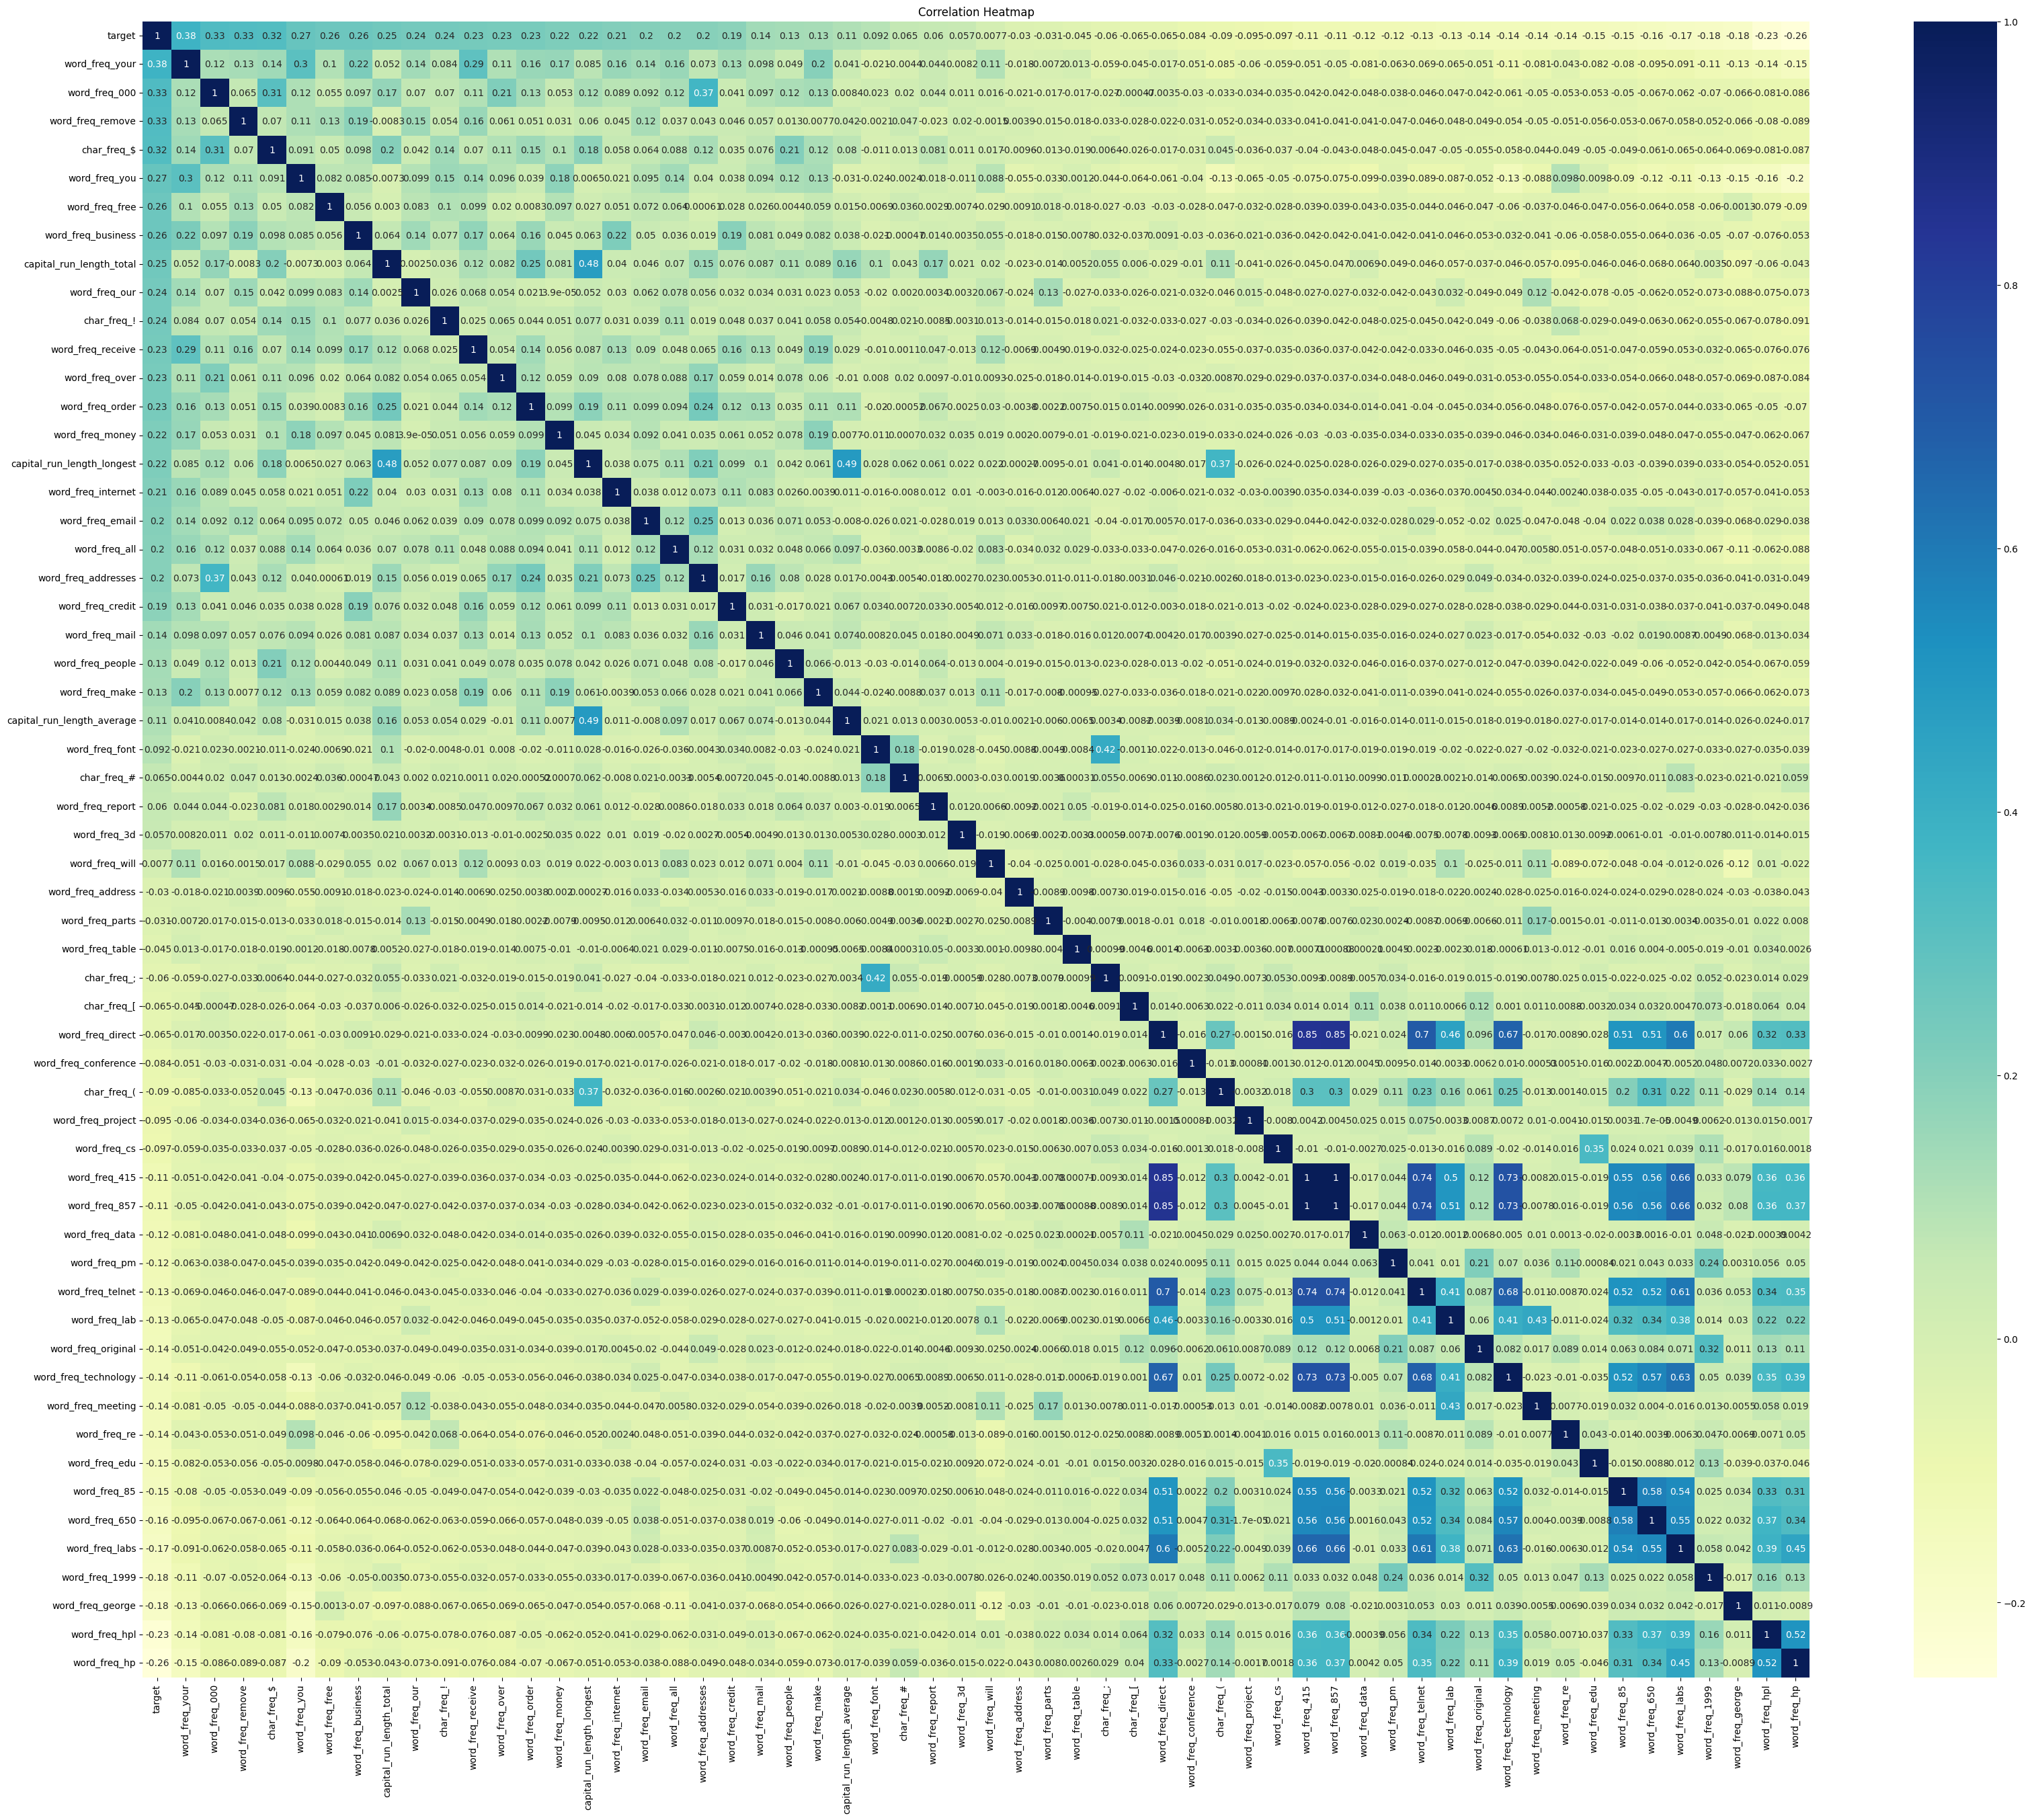

In [12]:
plt.figure(figsize=(40, 32))
sns.heatmap(df[corr_with_target.index].corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

<span style="color:#33b8ff; font-size:18px;">
Furthermore, let's plot a pairplot of the 7 input features that have the highest correlation<br>
with the target variable. This will allow us to visualize their relationship with the target<br>
variable in a more effective manner.
</span>

In [13]:
top_corr_features = corr_with_target.index[1:8]
top_corr_features

Index(['word_freq_your', 'word_freq_000', 'word_freq_remove', 'char_freq_$',
       'word_freq_you', 'word_freq_free', 'word_freq_business'],
      dtype='object')

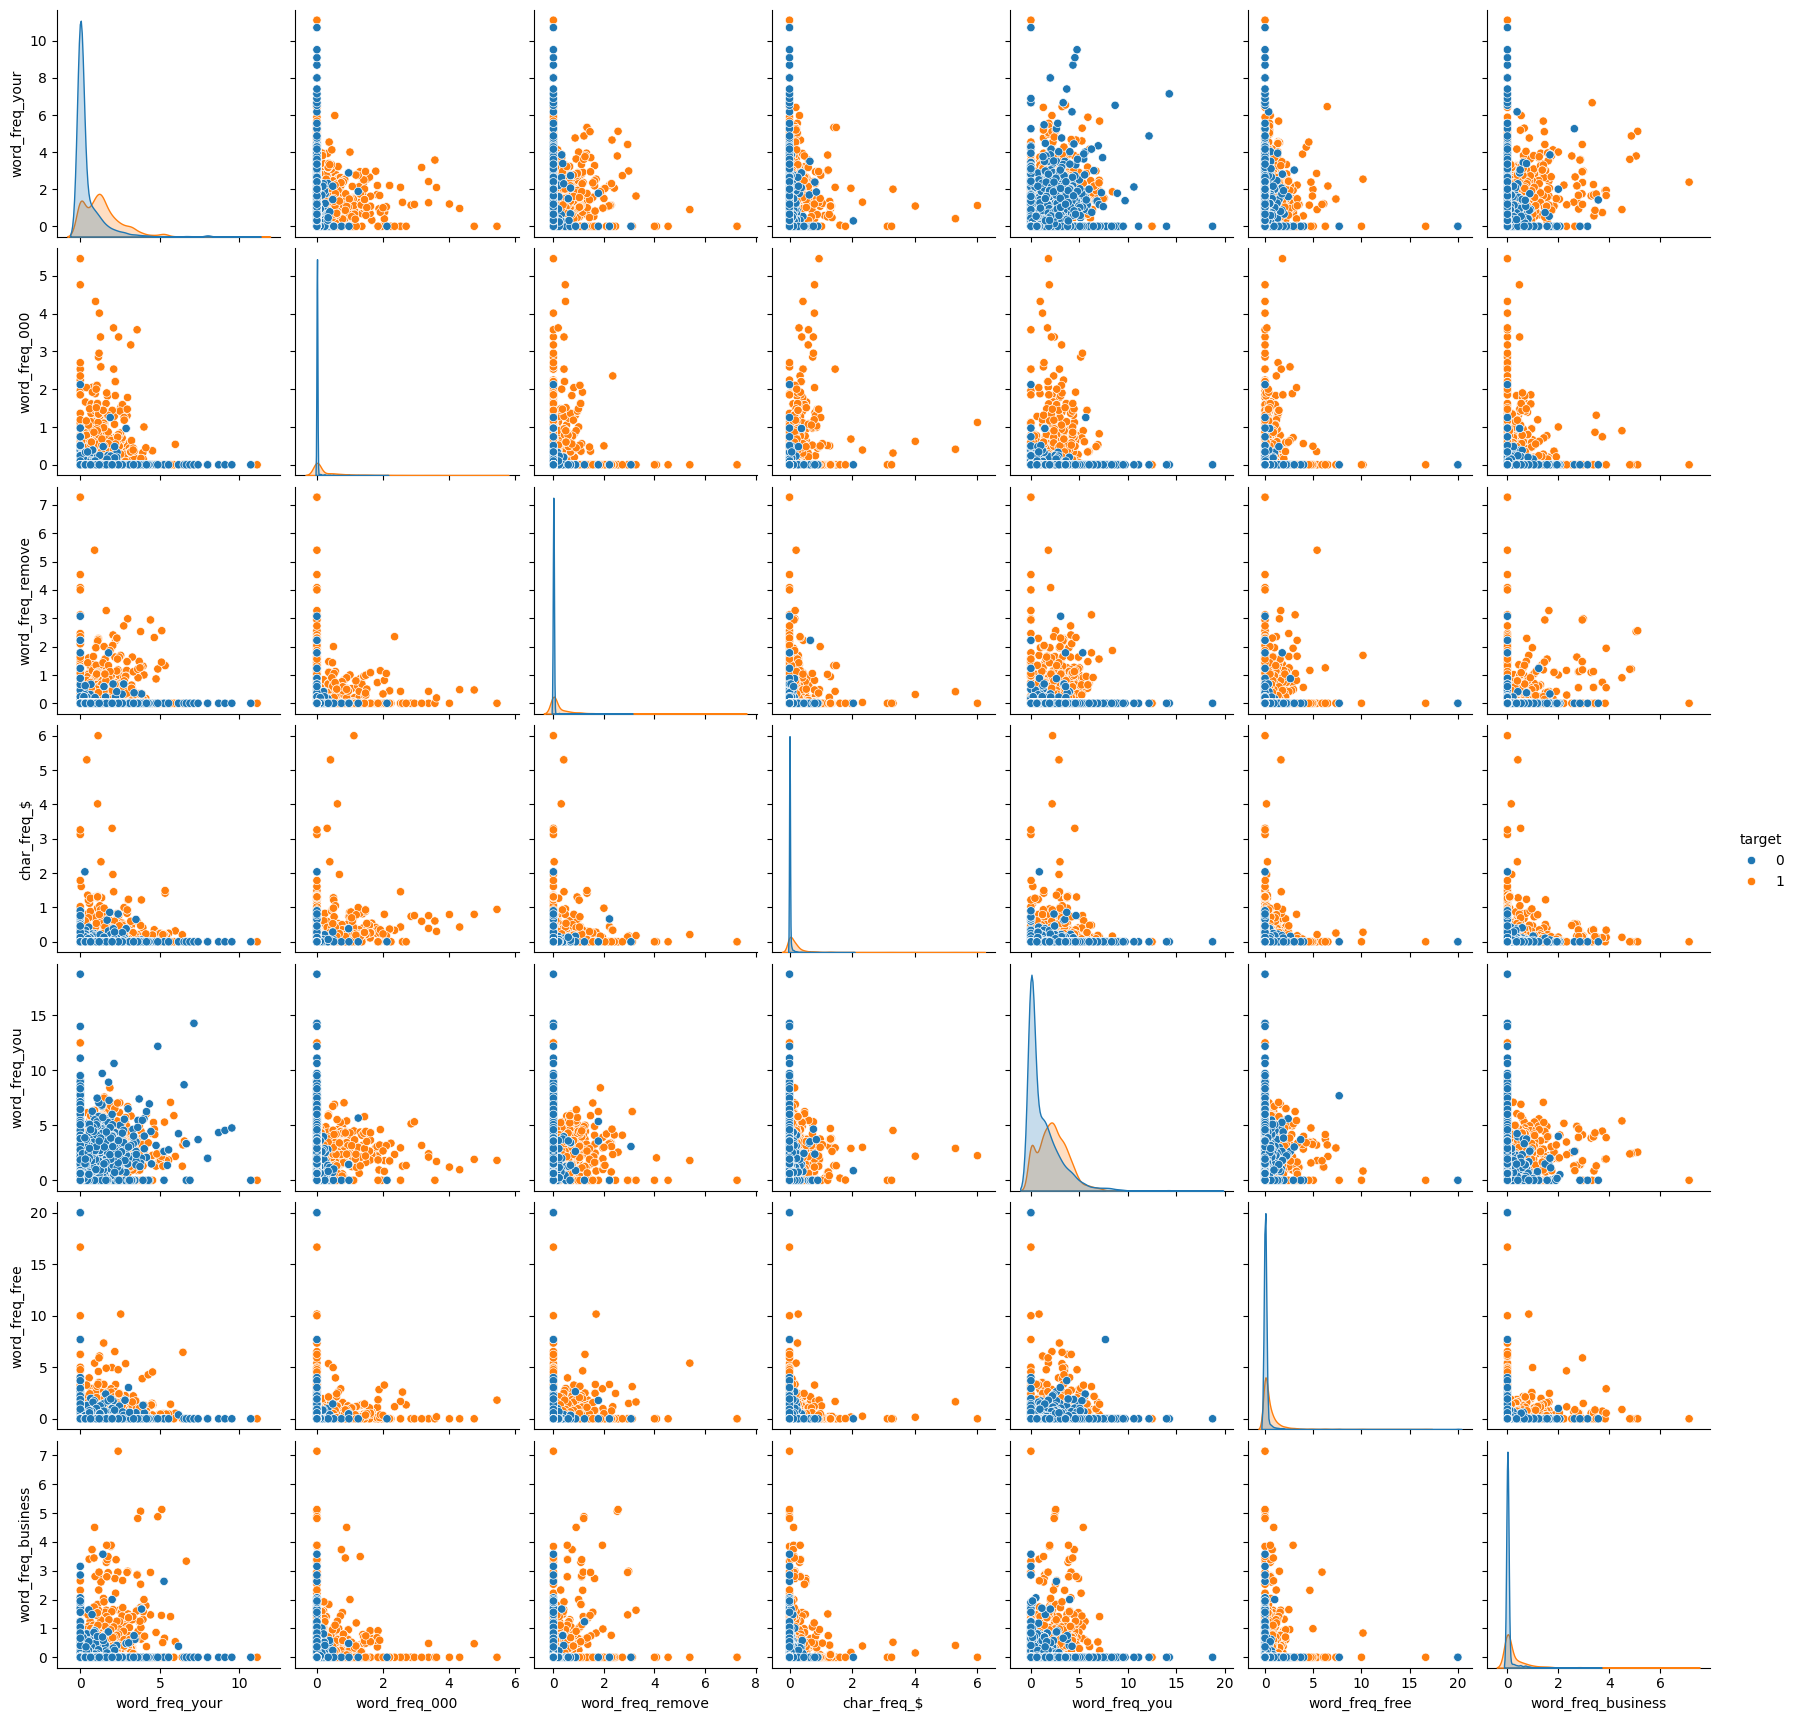

In [14]:
sns.pairplot(df, vars=top_corr_features, hue='target')
plt.show()

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
1.4 Are all of the features informative and useful in predicting the target variable?
</span>

<span style="color:#33b8ff; font-size:18px;">
Not all features in a dataset are always informative or useful for predicting<br>
the target variable. Some features might be redundant or irrelevant, and can be<br>
removed without incurring much loss of information. Reducing the number of features<br>
can help improve the performance of a machine learning model by alleviating issues<br>
such as overfitting and high computational cost.<br><br>
We will perform preprocessing steps to identify the most suitable features and<br>
ensure they are properly cleaned for the models that will be trained on the dataset.
</span>

# <a id='toc4_'></a>[<span style="color:#90ff33; font-weight:bold;"> Preprocessing </span>](#toc0_)

## <a id='toc4_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Features Importance </span>](#toc0_)

<span style="color:#33b8ff; font-size:18px;">
One way to find importance of each feature is to calculate<br>
the mutual information of each feature with the target variable<br>
that can be done using "mutual_info_classif" method in python.<br>
This method computes the information gain of each feature<br>
using the following formula:<br>
</sapn>

$H(X) - H(X|Y)$ <br>

<span style="color:#33b8ff; font-size:18px;">
That H(X) is entropy of X
</span>

In [15]:
discrete_features = [False for _ in list(X.columns)]

index = [col for col in list(X.columns)]

feature_importance = pd.DataFrame(columns = ['fi'], index = index)

feature_importance['fi'] = mutual_info_classif(X=X, y=y, discrete_features=discrete_features, random_state=1401)
feature_importance = feature_importance.sort_values(by='fi', ascending=False)

feature_importance

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,fi
char_freq_!,0.207199
capital_run_length_longest,0.186514
char_freq_$,0.179647
capital_run_length_average,0.172395
word_freq_your,0.160483
word_freq_remove,0.155613
capital_run_length_total,0.138657
word_freq_free,0.134731
word_freq_money,0.116666
word_freq_hp,0.116089


## <a id='toc4_2_'></a>[<span style="color:#90ff33; font-weight:bold;"> Checking for Missing Values </span>](#toc0_)

In [16]:
X.isna().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

<span style="color:#33b8ff; font-size:18px;">
As, you can observe, there's no missing value in this dataset.
</span>

## <a id='toc4_3_'></a>[<span style="color:#90ff33; font-weight:bold;"> Checking for Outliers </span>](#toc0_)

In [18]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    return outliers

In [21]:
outliers_count = {}

In [22]:
for col in X.columns:
    outliers_count[col] = len(detect_outliers_iqr(X, col))

In [23]:
sorted_outliers_count = {k: v for k, v in sorted(outliers_count.items(), key=lambda item: item[1])}


<span style="color:#33b8ff; font-size:18px;">
Now, you can observe the columns with their correspond outliers count:
</span>

In [24]:
for col, count in sorted_outliers_count.items():
    print(f"{col}: {count} outliers")

word_freq_3d: 47 outliers
word_freq_table: 63 outliers
word_freq_you: 75 outliers
word_freq_parts: 83 outliers
word_freq_font: 117 outliers
word_freq_cs: 148 outliers
word_freq_conference: 203 outliers
word_freq_857: 205 outliers
word_freq_415: 215 outliers
word_freq_your: 229 outliers
word_freq_will: 270 outliers
word_freq_telnet: 293 outliers
char_freq_(: 296 outliers
word_freq_project: 327 outliers
word_freq_addresses: 336 outliers
word_freq_all: 338 outliers
word_freq_meeting: 341 outliers
word_freq_report: 357 outliers
capital_run_length_average: 363 outliers
word_freq_lab: 372 outliers
word_freq_original: 375 outliers
word_freq_pm: 384 outliers
word_freq_data: 405 outliers
char_freq_!: 411 outliers
word_freq_credit: 424 outliers
word_freq_direct: 453 outliers
word_freq_650: 463 outliers
capital_run_length_longest: 463 outliers
word_freq_labs: 469 outliers
word_freq_85: 485 outliers
word_freq_our: 501 outliers
word_freq_edu: 517 outliers
char_freq_[: 529 outliers
capital_run_lengt

<span style="color:#33b8ff; font-size:18px;">
Now, we will proceed to select the top 10 best features for further steps.<br>
The criterion for selecting these best features is based on their importance.<br>
Additionally, we will address any outliers present in the chosen best features.
</span>

In [28]:
top_12_features = feature_importance.head(12).index
best_X = X[top_12_features]

In [29]:
best_X

,char_freq_!,capital_run_length_longest,char_freq_$,capital_run_length_average,word_freq_your,word_freq_remove,capital_run_length_total,word_freq_free,word_freq_money,word_freq_hp,word_freq_000,word_freq_you
0,0.778,61,0.000,3.756,0.96,0.00,278,0.32,0.00,0.0,0.00,1.93
1,0.372,101,0.180,5.114,1.59,0.21,1028,0.14,0.43,0.0,0.43,3.47
2,0.276,485,0.184,9.821,0.51,0.19,2259,0.06,0.06,0.0,1.16,1.36
3,0.137,40,0.000,3.537,0.31,0.31,191,0.31,0.00,0.0,0.00,3.18
4,0.135,40,0.000,3.537,0.31,0.31,191,0.31,0.00,0.0,0.00,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.000,3,0.000,1.142,0.00,0.00,88,0.00,0.00,0.0,0.00,0.62
4597,0.353,4,0.000,1.555,2.00,0.00,14,0.00,0.00,0.0,0.00,6.00
4598,0.000,6,0.000,1.404,0.30,0.00,118,0.00,0.00,0.0,0.00,1.50
4599,0.000,5,0.000,1.147,0.32,0.00,78,0.00,0.00,0.0,0.00,1.93


<span style="color:#33b8ff; font-size:18px;">
Let's see the outliers count in our best features:
</span>

In [30]:
for col in best_X.columns:
    print(f'{col} outliers count: {outliers_count[col]}')

char_freq_! outliers count: 411
capital_run_length_longest outliers count: 463
char_freq_$ outliers count: 811
capital_run_length_average outliers count: 363
word_freq_your outliers count: 229
word_freq_remove outliers count: 807
capital_run_length_total outliers count: 550
word_freq_free outliers count: 957
word_freq_money outliers count: 735
word_freq_hp outliers count: 1090
word_freq_000 outliers count: 679
word_freq_you outliers count: 75


<span style="color:#33b8ff; font-size:18px;">
Now, let's create box plots for each column to enhance the visualization of outliers.
</span>

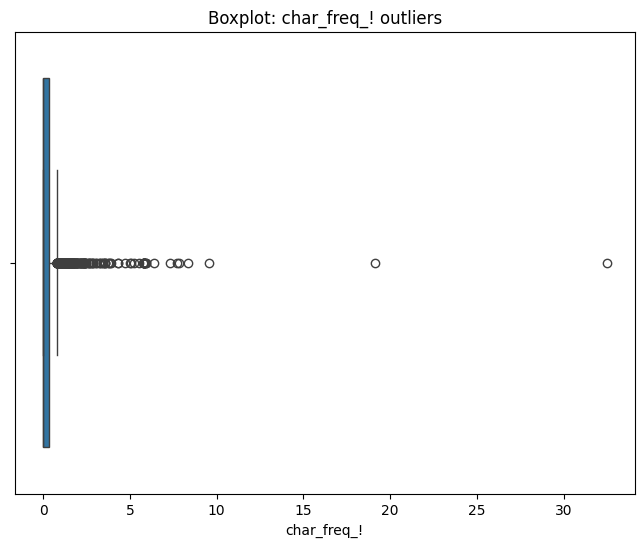

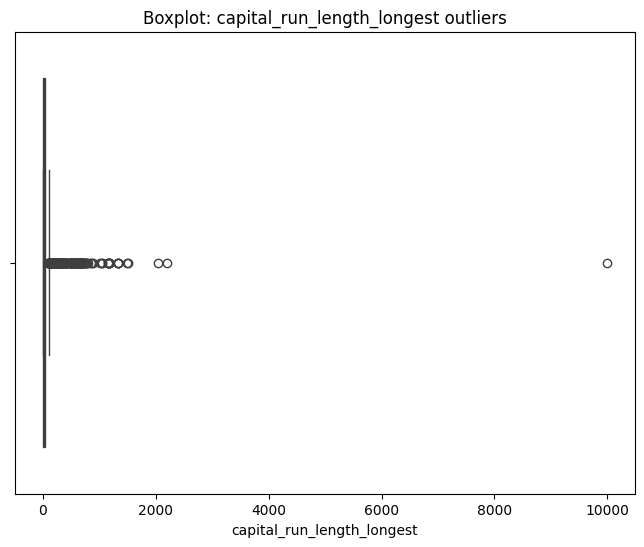

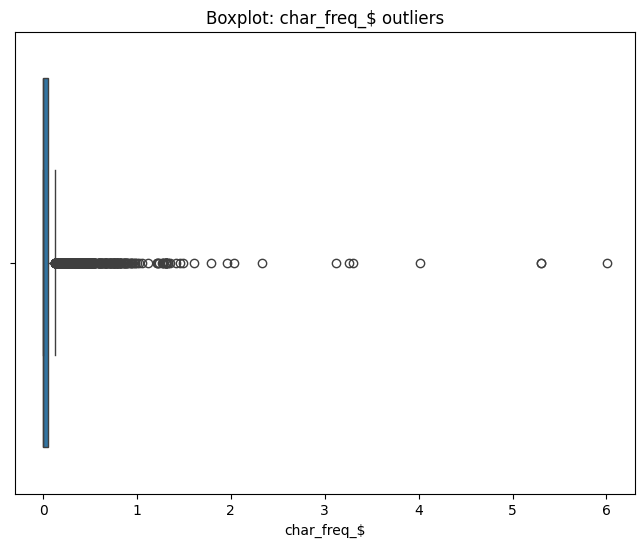

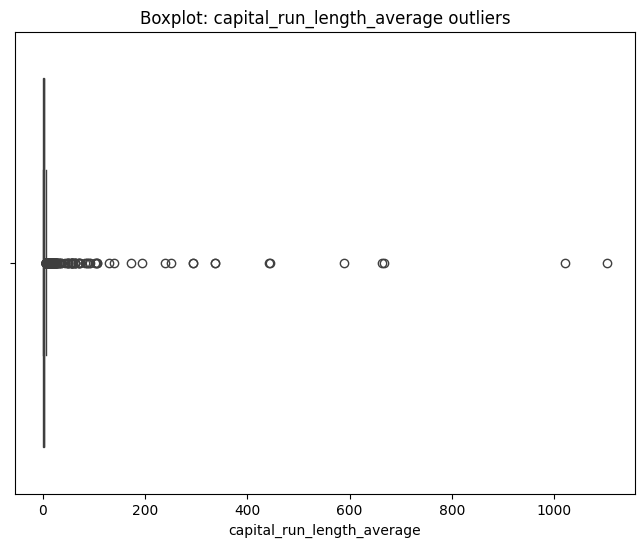

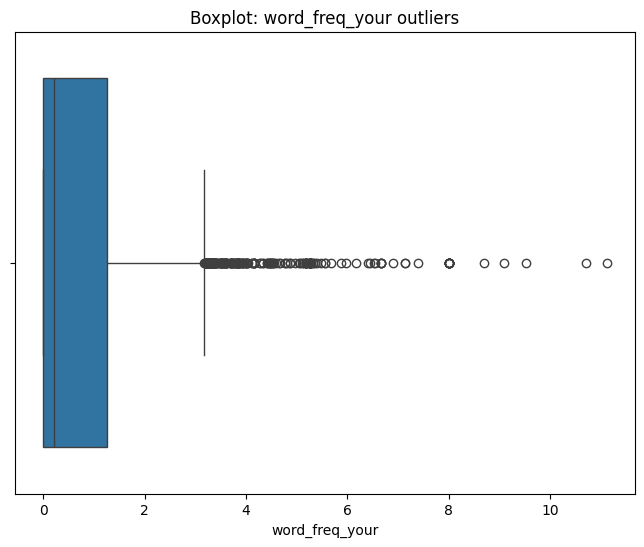

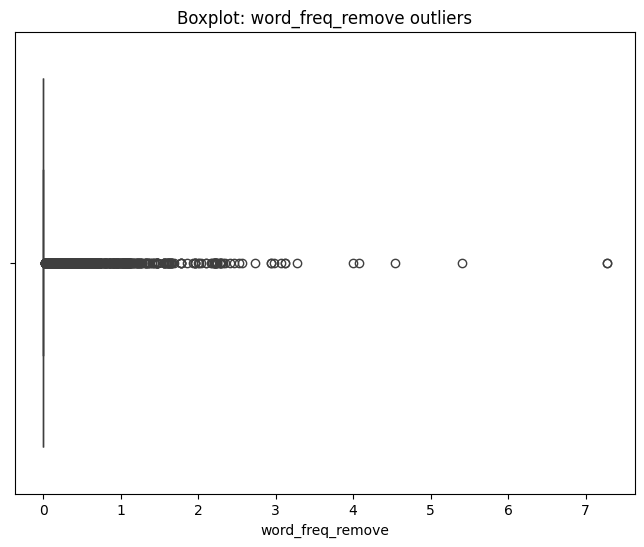

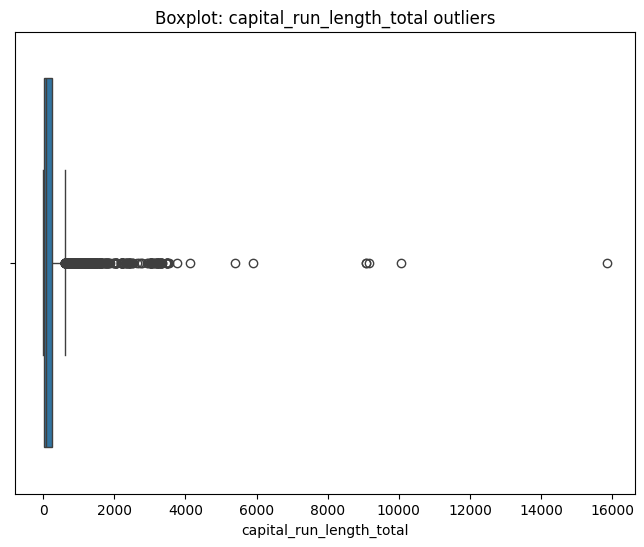

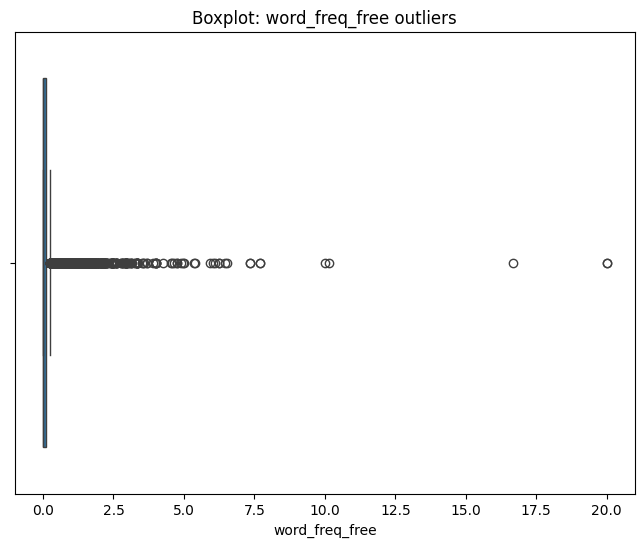

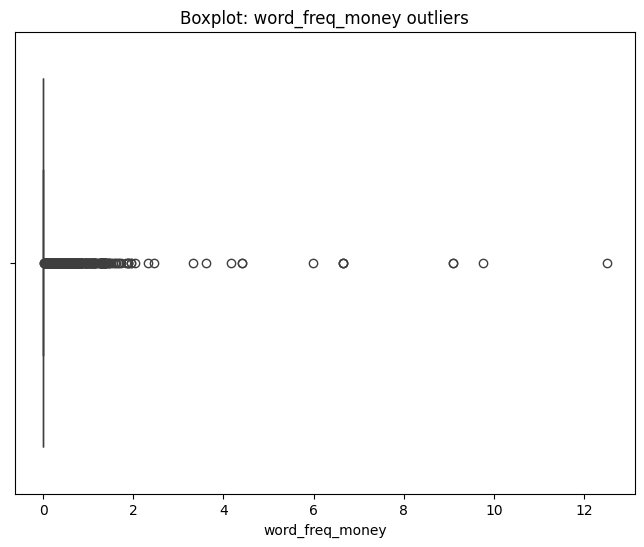

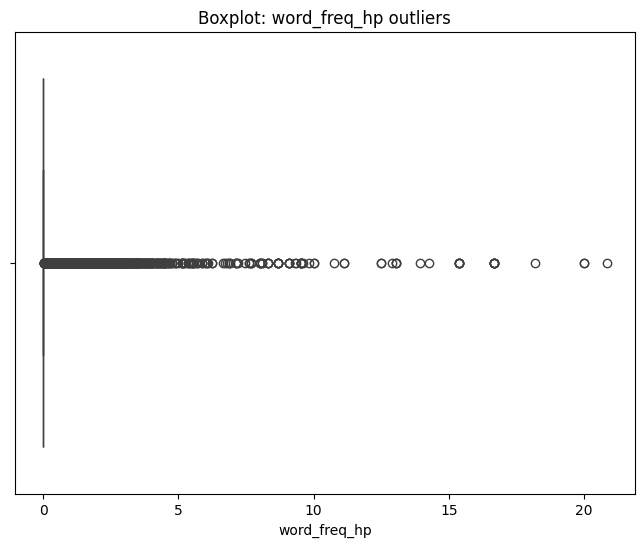

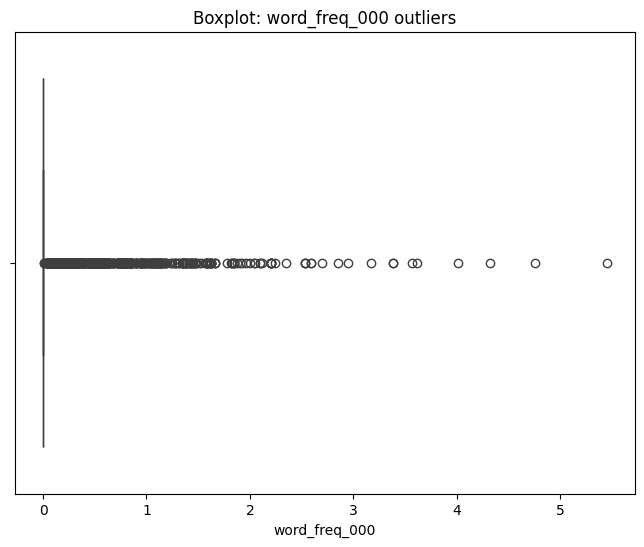

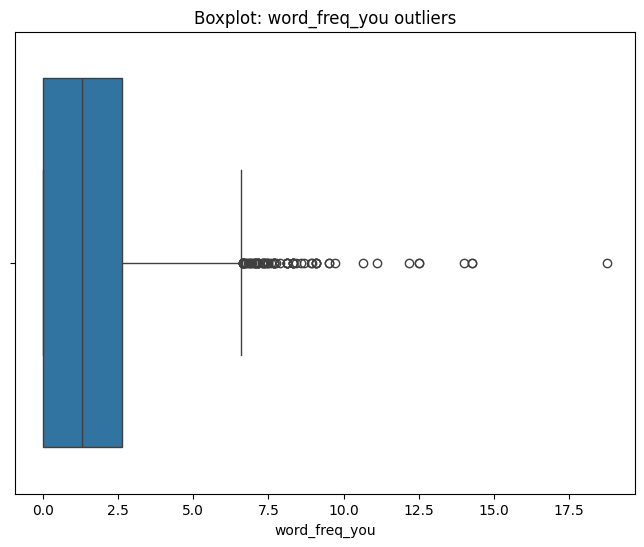

In [31]:
for col in best_X.columns:

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=best_X[col])
    plt.title(f'Boxplot: {col} outliers')
    plt.show()

    # Check for negative values in the column outliers
    negative_outliers = outliers_count[col] < 0
    if negative_outliers:
        print(f'Negative outliers exist in column: {col}')

<span style="color:#33b8ff; font-size:18px;">
Good news! The outliers in the dataset are not of a casual nature, and they<br>
 do not have negative values. Although they have a significant impact on our models,<br>
 they will not result in erroneous predictions. Therefore, there is no need to remove them.
</span>

# <a id='toc5_'></a>[<span style="color:#33ff9c; font-weight:bold;"> Question 2 </span>](#toc0_)

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
2.1 Split the dataset into train and test sets and reserve 30 percent<br>
of the data for the test set.
</span>

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
2.2 Train multiple ML models including Logistic Regression, KNN, Naive Bayes,<br>
Decision Tree, Adaboost, Random Forest, linear, and non-linear SVM.<br>
Furthermore, tune the hyperparameters for each model. Moreover, report<br>
the classification results and the time consumed for training each model<br>
</span>

## <a id='toc5_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Training Models </span>](#toc0_)

### <a id='toc5_1_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Utils </span>](#toc0_)

In [69]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    return best_params

def train_model(model, X_train, y_train, best_params):
    if best_params:
        model.set_params(**best_params)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    return model, training_time

def report_results(model_name, best_params, model, X_train, y_train, training_time):
    train_predictions = model.predict(X_train)
    train_report = classification_report(y_train, train_predictions)

    print(f"Model Name: {model_name}")

    if best_params:
        print(f"\nBest Hyperparameters: {best_params}")

    print(f"\nThe time consumed for training: {training_time} seconds")
    print("\nClassification Report for Train Data:")
    print(train_report)

### <a id='toc5_1_2_'></a>[<span style="color:#90ff33; font-weight:bold;"> Logistic Regression </span>](#toc0_)

In [70]:
logistic_model = LogisticRegression()
logistic_param_grid = {'C': [0.1, 1, 10],
                       'penalty': ['l1', 'l2']}

logestic_best_params = tune_hyperparameters(logistic_model, logistic_param_grid, X_train, y_train)
trained_model, training_time = train_model(logistic_model, X_train, y_train, logestic_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

In [71]:
report_results("Logistic Regression", logestic_best_params, trained_model, X_train, y_train, training_time)

Model Name: Logistic Regression

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

The time consumed for training: 0.029597997665405273 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1984
           1       0.90      0.87      0.89      1236

    accuracy                           0.91      3220
   macro avg       0.91      0.91      0.91      3220
weighted avg       0.91      0.91      0.91      3220



### <a id='toc5_1_3_'></a>[<span style="color:#90ff33; font-weight:bold;"> KNN </span>](#toc0_)

In [72]:
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}

knn_best_params = tune_hyperparameters(knn_model, knn_param_grid, X_train, y_train)
knn_trained_model, knn_training_time = train_model(knn_model, X_train, y_train, knn_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1

In [73]:
report_results("KNN", knn_best_params, knn_trained_model, X_train, y_train, knn_training_time)

Model Name: KNN

Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}

The time consumed for training: 0.0024111270904541016 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       1.00      1.00      1.00      1236

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220



### <a id='toc5_1_4_'></a>[<span style="color:#90ff33; font-weight:bold;"> Naive Bayes </span>](#toc0_)

<span style="color:#33b8ff; font-size:18px;">
Note that since Naive Bayes models do not require hyperparameter tuning,<br>
there is no need for the tune_hyperparameters method
</span>

In [74]:
naive_bayes_model = GaussianNB()

naive_bayes_trained_model, naive_bayes_training_time = train_model(naive_bayes_model, X_train, y_train, [])

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
report_results("KNN", [], knn_trained_model, X_train, y_train, knn_training_time)

Model Name: KNN

The time consumed for training: 0.0024111270904541016 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       1.00      1.00      1.00      1236

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220



### <a id='toc5_1_5_'></a>[<span style="color:#90ff33; font-weight:bold;"> Decision Tree </span>](#toc0_)

In [77]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_param_grid = {'max_depth': [None, 5, 10, 15],
                            'min_samples_split': [2, 5, 10]}

decision_tree_best_params = tune_hyperparameters(decision_tree_model, decision_tree_param_grid, X_train, y_train)
trained_decision_tree_model, decision_tree_training_time = train_model(decision_tree_model, X_train, y_train, decision_tree_best_params)

In [78]:
report_results("Decision Tree", decision_tree_best_params, trained_decision_tree_model, X_train, y_train, decision_tree_training_time)

Model Name: Decision Tree

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2}

The time consumed for training: 0.04006505012512207 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1984
           1       0.99      0.97      0.98      1236

    accuracy                           0.99      3220
   macro avg       0.99      0.98      0.98      3220
weighted avg       0.99      0.99      0.99      3220



### <a id='toc5_1_6_'></a>[<span style="color:#90ff33; font-weight:bold;"> Adaboost </span>](#toc0_)

In [80]:
adaboost_model = AdaBoostClassifier()
adaboost_param_grid = {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.1, 0.5, 1.0]}

adaboost_best_params = tune_hyperparameters(adaboost_model, adaboost_param_grid, X_train, y_train)
trained_adaboost_model, adaboost_training_time = train_model(adaboost_model, X_train, y_train, adaboost_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be

In [81]:
report_results("Adaboost", adaboost_best_params, trained_adaboost_model, X_train, y_train, adaboost_training_time)

Model Name: Adaboost

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}

The time consumed for training: 1.0771393775939941 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1984
           1       0.96      0.95      0.95      1236

    accuracy                           0.96      3220
   macro avg       0.96      0.96      0.96      3220
weighted avg       0.96      0.96      0.96      3220



### <a id='toc5_1_7_'></a>[<span style="color:#90ff33; font-weight:bold;"> Random Forest </span>](#toc0_)

In [83]:
random_forest_model = RandomForestClassifier()
random_forest_param_grid = {'n_estimators': [100, 200, 500],
                            'max_depth': [None, 5, 10, 15]}

random_forest_best_params = tune_hyperparameters(random_forest_model, random_forest_param_grid, X_train, y_train)
trained_random_forest_model, random_forest_training_time = train_model(random_forest_model, X_train, y_train, random_forest_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

In [84]:
report_results("Random Forest", random_forest_best_params, trained_random_forest_model, X_train, y_train, random_forest_training_time)

Model Name: Random Forest

Best Hyperparameters: {'max_depth': None, 'n_estimators': 500}

The time consumed for training: 2.3281164169311523 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1984
           1       1.00      1.00      1.00      1236

    accuracy                           1.00      3220
   macro avg       1.00      1.00      1.00      3220
weighted avg       1.00      1.00      1.00      3220



### <a id='toc5_1_8_'></a>[<span style="color:#90ff33; font-weight:bold;"> Linear SVM </span>](#toc0_)

In [86]:
linear_svm_model = LinearSVC()
linear_svm_param_grid = {'C': [0.1, 1, 10]}

linear_svm_best_params = tune_hyperparameters(linear_svm_model, linear_svm_param_grid, X_train, y_train)
trained_linear_svm_model, linear_svm_training_time = train_model(linear_svm_model, X_train, y_train, linear_svm_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [87]:
report_results("Linear SVM", linear_svm_best_params, trained_linear_svm_model, X_train, y_train, linear_svm_training_time)

Model Name: Linear SVM

Best Hyperparameters: {'C': 1}

The time consumed for training: 0.04235410690307617 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1984
           1       0.93      0.88      0.90      1236

    accuracy                           0.93      3220
   macro avg       0.93      0.92      0.92      3220
weighted avg       0.93      0.93      0.93      3220



### <a id='toc5_1_9_'></a>[<span style="color:#90ff33; font-weight:bold;"> Non-linear SVM </span>](#toc0_)

In [89]:
nonlinear_svm_model = SVC()
nonlinear_svm_param_grid = {'C': [0.1, 1, 10],
                            'kernel': ['rbf', 'poly', 'sigmoid']}

nonlinear_svm_best_params = tune_hyperparameters(nonlinear_svm_model, nonlinear_svm_param_grid, X_train, y_train)
trained_nonlinear_svm_model, nonlinear_svm_training_time = train_model(nonlinear_svm_model, X_train, y_train, nonlinear_svm_best_params)

/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/javad/My_Folder/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [90]:
report_results("Non-linear SVM", nonlinear_svm_best_params, trained_nonlinear_svm_model, X_train, y_train, nonlinear_svm_training_time)

Model Name: Non-linear SVM

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}

The time consumed for training: 0.30461788177490234 seconds

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1984
           1       0.76      0.47      0.58      1236

    accuracy                           0.74      3220
   macro avg       0.75      0.69      0.70      3220
weighted avg       0.74      0.74      0.72      3220



<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
2.3 What are training errors? Explain 2 of them at least.
</span>

<span style="color:#33b8ff; font-size:18px;">

During the training of a machine learning model, training errors refer to<br>
the discrepancies or mistakes made by the model during the learning process.<br>
Here are explanations of two common types of training errors:

1. Bias Error: Bias error, also known as underfitting, occurs when a model is too<br>
simplistic to capture the underlying patterns or complexity of the data. It often leads<br>
to high errors on both the training and testing data. Bias error can arise when the model<br>
is too simple or lacks the necessary features to accurately represent the data.<br>
It can result in a model that is unable to learn important relationships and produces<br>
inaccurate predictions.

2. Variance Error: Variance error, also known as overfitting, occurs when a model<br>
becomes too complex or too closely fits the training data, leading to poor generalization<br>
on unseen data. While a model with low bias aims to minimize training errors, it can suffer<br>
from high variance if the model becomes too sensitive to noise or random fluctuations in the<br>
training data. Overfitting typically results in low errors on the training data but performs<br>
poorly on new, unseen data.

</span>

# <a id='toc6_'></a>[<span style="color:#33ff9c; font-weight:bold;"> Question 3 </span>](#toc0_)

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
3.1 Apply the trained models on test dataset and report the classification results<br>
as well as the time consumed for test
</span>

## <a id='toc6_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Testing the Models </span>](#toc0_)

### <a id='toc6_1_1_'></a>[<span style="color:#90ff33; font-weight:bold;"> Utils </span>](#toc0_)

In [91]:
def report_test_results(model_name, model, X_test, y_test):
    start_time = time.time()
    test_predictions = model.predict(X_test)
    end_time = time.time()

    testing_time = end_time - start_time

    test_report = classification_report(y_test, test_predictions)

    print(f"Model Name: {model_name}")
    print(f"\nThe time consumed for testing: {testing_time} seconds")
    print("\nClassification Report for Test Data:")
    print(test_report)

### <a id='toc6_1_2_'></a>[<span style="color:#90ff33; font-weight:bold;"> Logistic Regression </span>](#toc0_)

In [92]:
report_test_results("Logistic Regression", logistic_model, X_test, y_test)

Model Name: Logistic Regression

The time consumed for testing: 0.007098197937011719 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       804
           1       0.91      0.89      0.90       577

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



### <a id='toc6_1_3_'></a>[<span style="color:#90ff33; font-weight:bold;"> KNN </span>](#toc0_)

In [93]:
report_test_results("KNN", knn_model, X_test, y_test)

Model Name: KNN

The time consumed for testing: 0.05263519287109375 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       804
           1       0.78      0.74      0.76       577

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



### <a id='toc6_1_4_'></a>[<span style="color:#90ff33; font-weight:bold;"> Naive Bayes </span>](#toc0_)

In [94]:
report_test_results("Naive Bayes", naive_bayes_model, X_test, y_test)

Model Name: Naive Bayes

The time consumed for testing: 0.013506650924682617 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381



### <a id='toc6_1_5_'></a>[<span style="color:#90ff33; font-weight:bold;"> Decision Tree </span>](#toc0_)

In [95]:
report_test_results("Decision Tree", decision_tree_model, X_test, y_test)

Model Name: Decision Tree

The time consumed for testing: 0.010582685470581055 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       804
           1       0.91      0.89      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



### <a id='toc6_1_6_'></a>[<span style="color:#90ff33; font-weight:bold;"> Adaboost </span>](#toc0_)

In [96]:
report_test_results("Adaboost", adaboost_model, X_test, y_test)

Model Name: Adaboost

The time consumed for testing: 0.15080857276916504 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       804
           1       0.95      0.93      0.94       577

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



### <a id='toc6_1_7_'></a>[<span style="color:#90ff33; font-weight:bold;"> Random Forest </span>](#toc0_)

In [97]:
report_test_results("Random Forest", random_forest_model, X_test, y_test)

Model Name: Random Forest

The time consumed for testing: 0.17069625854492188 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       804
           1       0.96      0.93      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



### <a id='toc6_1_8_'></a>[<span style="color:#90ff33; font-weight:bold;"> Linear SVM </span>](#toc0_)

In [98]:
report_test_results("Linear SVM", linear_svm_model, X_test, y_test)

Model Name: Linear SVM

The time consumed for testing: 0.010412216186523438 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.92      0.92      1381



### <a id='toc6_1_9_'></a>[<span style="color:#90ff33; font-weight:bold;"> Non-linear SVM </span>](#toc0_)

In [99]:
report_test_results("Non-linear SVM", nonlinear_svm_model, X_test, y_test)

Model Name: Non-linear SVM

The time consumed for testing: 0.20825815200805664 seconds

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.71      0.91      0.79       804
           1       0.79      0.48      0.59       577

    accuracy                           0.73      1381
   macro avg       0.75      0.69      0.69      1381
weighted avg       0.74      0.73      0.71      1381



<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
3.2 Which model had the best performance and why?
</span>

<span style="color:#33b8ff; font-size:18px;">

As you can observe the Random Forest model had the best performance while<br>
the Non-linear SVM and KNN models were the weakest. The performance of machine learning<br>
models can vary based on the characteristics of the dataset and the inherent properties<br>
of the models themselves. Here are some justifications for why the Random Forest model might<br>
have outperformed the non-linear SVM and KNN models in our scenario:<br>

1. Handling Non-linear Relationships: Non-linear SVM models are known for their ability<br>
to handle non-linear relationships. However, in cases where the decision boundaries are highly<br>
complex and have non-linear patterns, the Random Forest model can often provide better performance.<br>
Random Forests operate by creating an ensemble of decision trees and combining their predictions<br>
through voting or averaging. This ensemble approach can capture intricate non-linear relationships<br>
more effectively than individual non-linear SVM models.<br>

2. Robustness Against Noisy Data: KNN models are sensitive to noise and outliers in the data.<br>
If our dataset contained a significant amount of noise or outliers, it could have negatively impacted<br>
the performance of the KNN model. Random Forests, on the other hand, are generally more robust to noisy<br>
data since each decision tree in the ensemble is trained on a subset of the data and is less likely to<br>
be affected by outliers.<br>

3. Feature Importance and Dimensionality: Random Forests have the advantage of providing feature importance<br>
measures. This can help in identifying the most relevant features for the classification task. In contrast,<br>
non-linear SVM models do not inherently provide feature importance measures. Additionally, if the dataset<br>
has a high dimensionality, Random Forest models can handle a large number of features more efficiently compared<br>
to non-linear SVM models.<br>

</span>

<span style="color:#ff33c7; font-size:20px; font-weight:bold;">
3.3 Can eliminating non-informative features improve the results?
</span>

<span style="color:#33b8ff; font-size:18px;">
Eliminating non-informative features of a dataset can potentially improve<br>
the results of training a machine learning model. Here's why:<br>

1. Reduce Overfitting: Non-informative features do not contribute meaningful information<br>
to the model's learning process. Including them in the model can lead to overfitting,<br>
where the model becomes too complex and starts interpreting noise or irrelevant patterns<br>
in the data. By removing non-informative features, the model becomes more focused on<br>
the relevant patterns and reduces the chances of overfitting.<br>

2. Improve Model Efficiency: Including non-informative features increases the<br>
dimensionality of the dataset. High-dimensional datasets can make the model more<br>
computationally expensive and increase the risk of the curse of dimensionality.<br>
By eliminating non-informative features, the dataset's dimensionality is reduced,<br>
leading to faster training times and potentially better model performance.<br>

3. Enhance Interpretability: Non-informative features can introduce noise and make<br>
it more challenging to interpret the model's results. The presence of irrelevant features<br>
can obscure the true relationships between the input features and the target variable.<br>
By removing non-informative features, the model becomes more interpretable, enabling easier<br>
identification and understanding of the meaningful relationships.<br>

</span>